## 1. 基于Logistic回归和Sigmoid函数的分类

> 优点：计算代价不高、易于理解和实现

> 缺点：容易欠拟合，分类精度可能不高

> 适用数据类型：数值型和标称型数据

对于分类问题，我们需要一个函数，这个函数能接受所有的输入然后预测出类别，如在两个类的情况下，该函数输出0或1.

有个Sigmoid函数就满足该特性：

$\sigma \left( z\right) =\dfrac {1}{1+e^{-z}}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [6]:
def plotSigmoid():
    x = np.linspace(-10, 10, 100)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('Sigmoid(x)')
    plt.show()

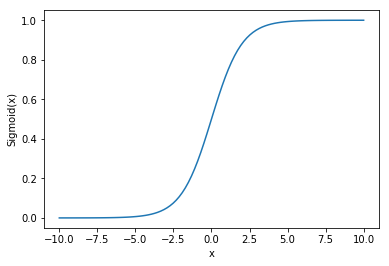

In [7]:
plotSigmoid()

## 2. 基于最优化方法的最佳回归系数确定

### 2.1 梯度上升法

梯度上升是一种寻找最优化算法，基本思想是：要找到某函数的最大值，最好的方法就是沿着该函数的梯度方向寻找。

$w:=w+\alpha \nabla _{w}f\left( w\right)$

至于梯度下降算法，是用来求函数的最小值的。

$w:=w-\alpha \nabla _{w}f\left( w\right)$

### 2.2 训练算法：使用梯度上升找到最佳参数

In [4]:
def loadDataSet():
    dataMat = []
    labelMat = []
    with open('testSet.txt') as f:
        for line in f.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[-1]))
    return dataMat, labelMat

In [8]:
def gradAscent(dataMatIn, classLabel):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabel).T
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.T * error
    return weights

In [17]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 2.3 分析数据：画出决策边界

In [25]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    m, n = dataArr.shape
    xcord1 = []
    xcord2 = []
    ycord1 = []
    ycord2 = []
    for i in range(m):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(xcord1, ycord1, c='r', marker='s')
    ax.scatter(xcord2, ycord2, c='g')
    x = np.arange(-3.0, 3.0, 0.1)
    weights = np.array(weights)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

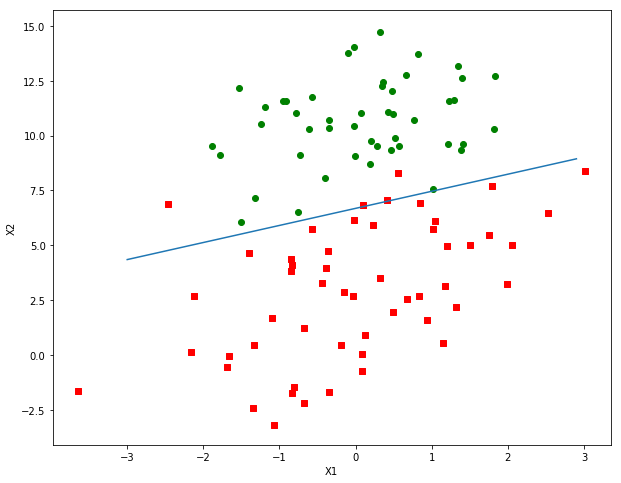

In [26]:
plotBestFit(weights)

### 2.4 训练算法：随机梯度上升

梯度上升算法在每次更新回归系数时都需要便利整个数据集，在处理多特征数据集时九三复杂度太高。一种改进的方法就是一次仅用一个样本点更新回归系数，该方法称为*随机梯度上升算法*，该方法是一个在线学习算法。

In [36]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = dataMatrix.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [37]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(np.array(dataArr), labelMat)
weights

array([ 1.01702007,  0.85914348, -0.36579921])

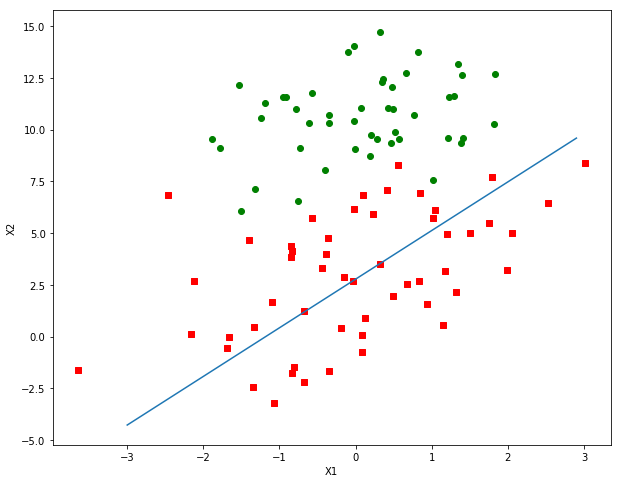

In [38]:
plotBestFit(weights)

In [39]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = dataMatrix.shape
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 每次动态调整
            alpha = 4/(1.0+j+i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]
    return weights

In [40]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat)
weights

array([ 14.50073616,   1.11726996,  -2.11185174])

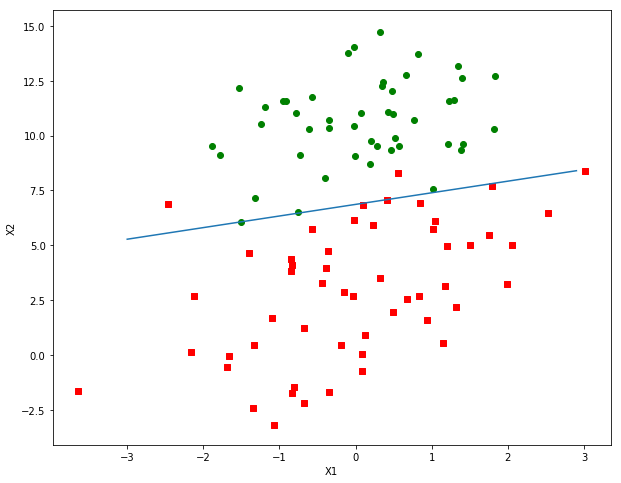

In [41]:
plotBestFit(weights)

## 3. 示例：从疝气病症预测变更妈的死亡率

### 3.1 准备数据：处理数据中缺失值

> 可用特征的均值来填补缺失值

> 使用特殊值来填补缺失值，如-1

> 忽略有缺失值的样本

> 使用相似样本的均值填补缺失值

> 使用另外的机器学习算法预测缺失值

### 3.2 测试算法：用Logistic回归进行分类

In [42]:
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [63]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = [1]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0
    for line in frTest.readlines():
        numTestVec += 1
        currLine = line.strip().split('\t')
        lineArr = [1]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[-1]):
            errorCount += 1
    errorRate = errorCount/numTestVec
    print('the error rate of this test is: {}'.format(errorRate))
    return errorRate

In [60]:
def multiTest():
    numTest = 10
    errorSum = 0.0
    for k in range(numTest):
        errorSum += colicTest()
    print('after {0} iterations the average error rate is: {1}'.format(numTest, errorSum/numTest))

In [64]:
multiTest()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.43283582089552236
the error rate of this test is: 0.3582089552238806
the error rate of this test is: 0.31343283582089554
the error rate of this test is: 0.43283582089552236
the error rate of this test is: 0.3283582089552239
the error rate of this test is: 0.417910447761194
the error rate of this test is: 0.3582089552238806
the error rate of this test is: 0.29850746268656714
the error rate of this test is: 0.373134328358209
the error rate of this test is: 0.4626865671641791
after 10 iterations the average error rate is: 0.37761194029850753


本身数据就有30%的缺失，这个效果其实不错，调整步长，效果或许更好。

> 总结：Logistic回归的目的是寻找一个非线性函数Sigmoid的最佳拟合参数，求解过程是用最优化算法完成的，最常用的就是梯度上升算法。

> 而随机梯度上升算法是梯度上升算法的改进版本，效果相当却占用更少的计算资源，额日期是一种在线算法，在新数据到来时完成参数更新，而不需要重新读取整个数据集进行批处理。